In [2]:
import numpy as np
import math 
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
def keys(f):
    return [key for key in f.keys()]
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift ,ifft
import gwpy
from gwpy.timeseries import TimeSeries
from scipy.interpolate import CubicSpline as spline
#h5py.run_tests()
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c

In [3]:
def analyze(file):
    
    dat = list(file["/rh_22"])
    rh = np.array(file["/rh_22/%s" %dat[-1]])
    
    peaks,prop=scipy.signal.find_peaks(abs(rh[:,1]))
    mx=np.where(abs(rh[peaks])==np.amax(abs(rh[peaks,1])))[0][0]
    
    for i in range(mx,len(peaks)):
        if abs(rh[peaks[i],1])<abs(rh[peaks[i+1],1]):
            mn=i
            break
            
    for i in range(mn,len(peaks)):
        if abs(rh[peaks[i],1])>abs(rh[peaks[i+1],1]):
            mx2=i
            break
    
    dt=rh[peaks[mn],0]-rh[peaks[mx],0]
    rhM=abs(rh[peaks[mx2],1])
    return dt,rhM

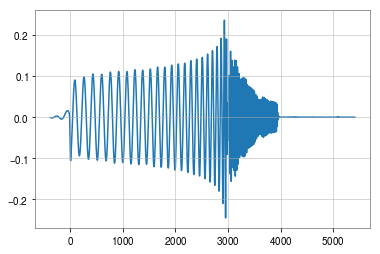

In [3]:
name = 'data/BAM:0005.h5'                                 #change that
file=h5py.File(name,'r')
dat = list(file["/rh_22"])
rh = np.array(file["/rh_22/%s" %dat[-1]])


plt.plot(rh[:,0],rh[:,1])
plt.show()

In [4]:
peaks,prop=scipy.signal.find_peaks(abs(rh[:,1]))
mx=np.where(abs(rh[peaks])==np.amax(abs(rh[peaks,1])))[0][0]


In [5]:
for i in range(mx,len(peaks)):
    if abs(rh[peaks[i],1])<abs(rh[peaks[i+1],1]):
        mn=i
        break

In [6]:
for i in range(mn,len(peaks)):
    if abs(rh[peaks[i],1])>abs(rh[peaks[i+1],1]):
        mx2=i
        break

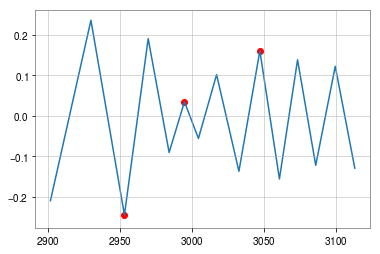

In [7]:
plt.plot(rh[peaks[mx-2:mn+10],0],rh[peaks[mx-2:mn+10],1])
plt.scatter(rh[peaks[mx],0],rh[peaks[mx],1],color='r')
plt.scatter(rh[peaks[mn],0],rh[peaks[mn],1],color='r')
plt.scatter(rh[peaks[mx2],0],rh[peaks[mx2],1],color='r')

In [8]:
dt=rh[peaks[mn],0]-rh[peaks[mx],0]
rhM=abs(rh[peaks[mx2],1])
dt,rhM

(41.69699999999966, 0.1605808)

In [4]:
dtM=np.zeros(128)
rhM=np.zeros(128)
names=list()
code=np.zeros(128)
l=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'data/BAM:0%s%s%s.h5' %(m,k,j)
            try:
                file=h5py.File(name,'r')
                dtM[l],rhM[l]=analyze(file)
                names.append(name)
                code[l]=m*100+k*10+j
                l=l+1
                
            except OSError:
                pass

In [10]:
for i in range(len(dtM)):
    print(code[i],dtM[i],rhM[i])

1.0 114.9090000000001 0.0001388746
2.0 94.58000000000015 0.1403105
3.0 61.22599999999966 0.1715187
4.0 45.45500000000004 0.1875771
5.0 41.69699999999966 0.1605808
6.0 45.55899999999974 0.1930303
7.0 40.71900000000005 0.1719859
8.0 55.25199999999995 0.1697863
9.0 79.68000000000006 0.1160773
10.0 61.924800000000005 0.1769572
11.0 56.88799999999992 0.09640564
12.0 63.99900000000025 0.1796872
13.0 44.58800000000019 0.1490184
14.0 66.89099999999962 0.1447935
15.0 45.55799999999999 0.1429634
16.0 71.66499999999996 0.001879397
17.0 44.60500000000002 0.1226045
18.0 44.58600000000024 0.06418684
19.0 61.070000000000164 0.06743334
20.0 62.0329999999999 0.07359426
21.0 92.11999999999989 0.03335768
22.0 37.833000000000084 0.1829833
23.0 63.867000000000075 0.1397806
24.0 49.5064000000001 0.13723
25.0 60.87800000000004 0.1787089
26.0 54.45690000000002 0.1075671
27.0 35.15219999999999 0.117612
28.0 55.945499999999925 0.1224305
29.0 50.496399999999994 0.09835782
30.0 50.48419999999999 0.1107654
31.0 62

In [5]:
SLy=1
H4=2
MS1=3
MPA1=4
ALF2=5
MS1b=6
ms1b=6
ENG=7
H2=8
G2=9
G2k123=10


In [6]:
q = np.zeros(128)
mas=np.zeros(128)
eos=np.zeros(128)


i=0
for m in range(0,2):
    for k in range(0,10):
        for j in range(0,10):
            name = 'metadata/BAM:0%s%s%s.txt' %(m,k,j)
            try:
                f=open(name)
                lines=f.readlines() 
                exec(lines[10])
                q[i] = id_mass_ratio
                exec(lines[8])
                mas[i]=id_mass
                if i>1:
                    exec(lines[15])
                    eos[i]=id_eos
                
                i=i+1
            except OSError:
                pass



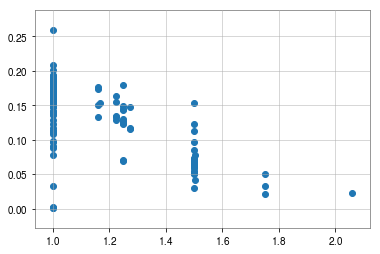

In [7]:
plt.scatter(q,rhM)

In [8]:
mas12=np.zeros([128,2])
for i in range(128):
    mas12[i,0]=(q[i]*mas[i])/(1+q[i])
    mas12[i,1]=(mas[i])/(1+q[i])

In [9]:
m_r1=np.load('/home/jannis/Documents/pyTOVpp/results/SLy.npy')
m_r2=np.load('/home/jannis/Documents/pyTOVpp/results/H4.npy')
m_r3=np.load('/home/jannis/Documents/pyTOVpp/results/MS1.npy')
m_r4=np.load('/home/jannis/Documents/pyTOVpp/results/MPA1.npy')
m_r5=np.load('/home/jannis/Documents/pyTOVpp/results/ALF2.npy')
m_r6=np.load('/home/jannis/Documents/pyTOVpp/results/MS1b.npy')
m_r7=np.load('/home/jannis/Documents/pyTOVpp/results/ENG.npy')
m_r8=np.load('/home/jannis/Documents/pyTOVpp/results/2H.npy')


k_l1=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_SLy.npy')
k_l2=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_H4.npy')
k_l3=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_MS1.npy')
k_l4=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_MPA1.npy')
k_l5=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_ALF2.npy')
k_l6=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_MS1b.npy')
k_l7=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_ENG.npy')
k_l8=np.load('/home/jannis/Documents/pyTOVpp/results/k_l_2H.npy')

In [10]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])

mx=np.amax(m_r6[0])
idx=np.where(m_r6[0]==mx)
idx=idx[0][0]
cs6=spline(m_r6[0][1:idx],k_l6[0][1:idx])
cs61=spline(m_r6[0][1:idx],m_r6[1][1:idx])

mx=np.amax(m_r7[0])
idx=np.where(m_r7[0]==mx)
idx=idx[0][0]
cs7=spline(m_r7[0][1:idx],k_l7[0][1:idx])
cs71=spline(m_r7[0][1:idx],m_r7[1][1:idx])

mx=np.amax(m_r8[0])
idx=np.where(m_r8[0]==mx)
idx=idx[0][0]
cs8=spline(m_r1[0][1:idx],k_l8[0][1:idx])
cs81=spline(m_r8[0][1:idx],m_r8[1][1:idx])

In [11]:
k212=np.zeros([128,2])
r12=np.zeros([128,2])
for i in range(128):
    if eos[i]==1:
        k212[i,0]=cs1(mas12[i,0])
        k212[i,1]=cs1(mas12[i,1])
        r12[i,0]=cs11(mas12[i,0])
        r12[i,1]=cs11(mas12[i,1])
    elif eos[i]==2:
        k212[i,0]=cs2(mas12[i,0])
        k212[i,1]=cs2(mas12[i,1])
        r12[i,0]=cs21(mas12[i,0])
        r12[i,1]=cs21(mas12[i,1])
    elif eos[i]==3:
        k212[i,0]=cs3(mas12[i,0])
        k212[i,1]=cs3(mas12[i,1])
        r12[i,0]=cs31(mas12[i,0])
        r12[i,1]=cs31(mas12[i,1])
    elif eos[i]==4:
        k212[i,0]=cs4(mas12[i,0])
        k212[i,1]=cs4(mas12[i,1])
        r12[i,0]=cs41(mas12[i,0])
        r12[i,1]=cs41(mas12[i,1])
    elif eos[i]==5:
        k212[i,0]=cs5(mas12[i,0])
        k212[i,1]=cs5(mas12[i,1])
        r12[i,0]=cs51(mas12[i,0])
        r12[i,1]=cs51(mas12[i,1])
    elif eos[i]==6:
        k212[i,0]=cs6(mas12[i,0])
        k212[i,1]=cs6(mas12[i,1])
        r12[i,0]=cs61(mas12[i,0])
        r12[i,1]=cs61(mas12[i,1])
    elif eos[i]==7:
        k212[i,0]=cs7(mas12[i,0])
        k212[i,1]=cs7(mas12[i,1])
        r12[i,0]=cs71(mas12[i,0])
        r12[i,1]=cs71(mas12[i,1])
    elif eos[i]==8:
        k212[i,0]=cs8(mas12[i,0])
        k212[i,1]=cs8(mas12[i,1])
        r12[i,0]=cs81(mas12[i,0])
        r12[i,1]=cs81(mas12[i,1])
    

In [12]:
l=np.zeros([128,2])
lamda=np.zeros(128)
for i in range(128):
    l[i,0]=(2.0/3.0)*k212[i,0]*(1.0/pow(mas12[i,0]/r12[i,0],5))
    l[i,1]=(2.0/3.0)*k212[i,1]*(1.0/pow(mas12[i,1]/r12[i,1],5))
    lamda[i]=(16/13)*( ( (mas12[i,0]+12*mas12[i,1])*pow(mas12[i,0],4)*l[i,0]+(mas12[i,1]+12*mas12[i,0])*pow(mas12[i,1],4)*l[i,1] )/pow( mas12[i,0]+mas12[i,1],5 ) )

/home/jannis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/jannis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [13]:
lamda

array([   0.        ,    0.        ,  711.9984486 ,
        709.07771604,  636.33371579,  634.90256601,
        635.61777949,  634.90256601, 1115.48110466,
        717.36412695,  369.5185008 ,  650.89747243,
        649.48901099,  650.01428045,  649.48901099,
        236.48828629,  677.29563434,  675.74758035,
        676.17186828,  675.74758035,  711.78557751,
        462.54254685,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,
          0.        , 1070.23570403, 1067.91477278,
        972.16210131,  968.3634154 ,  968.53693112,
        968.3634154 ,  963.53552254,  958.34943428,
        956.53317913,  957.4398699 ,  956.53317913,
       1087.32604609,  544.39152004,  986.78135659,
        985.5749271 ,  984.82007971,  984.82007971,
        343.66265666, 1058.95044025, 1056.86165602,
       1057.50061108, 1056.86165602, 1158.07907796,
        589.

In [15]:
np.save('lamda.npy',lamda)